In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1 
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Answer: 
Let us have two matrices, A of (n,k) and B of (k,m). On multiplying A and B, we get C of dimensions (n,m). Each row of A has k elements that gets multiplied by each k columns of B. That is, for each row-column pair that results in one element of C, we have k multiplications and (k-1) additions.

Since total we have (n,m) elements in C, that is `n*m` elements. The total number of multiplications will be `(n*m*k)`. Total number of additions will be `n*m*(k-1)`.

# 2
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [194]:
def multiply_lists(A, B):
    result = np.zeros((len(A),len(B[0])))
    
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]

    return result

A = [[1, 2], [3, 4], [5, 6]]
B = [[7, 8], [9, 10]]

result_lists = multiply_lists(A, B)
print("Matrix multiplication using lists:")
print(result_lists)


Matrix multiplication using lists:
[[ 25.  28.]
 [ 57.  64.]
 [ 89. 100.]]


In [195]:
def multiply_numpy(A, B):
    return np.dot(A, B)

A_np = np.array([[1, 2], [3, 4], [5, 6]])
B_np = np.array([[7, 8], [9, 10]])

result_numpy = multiply_numpy(A_np, B_np)
print("Matrix multiplication using NumPy:")
print(result_numpy)

Matrix multiplication using NumPy:
[[ 25  28]
 [ 57  64]
 [ 89 100]]


In [197]:
import time

start_lists = time.time()
result_lists = multiply_lists(A, B)
end_lists = time.time()

start_numpy = time.time()
result_numpy = multiply_numpy(A_np, B_np)
end_numpy = time.time()

# Print timing results
print("Time taken for matrix multiplication using lists: {} seconds".format(end_lists - start_lists))
print("Time taken for matrix multiplication using NumPy: {} seconds".format(end_numpy - start_numpy))

print("The numpy solution is faster as numpy uses C and Fortran libraries to compute, whereas when using lists, Python is on its own which is quite slow compared to C and Fortran.")

Time taken for matrix multiplication using lists: 0.00047898292541503906 seconds
Time taken for matrix multiplication using NumPy: 0.0005297660827636719 seconds
The numpy solution is faster as numpy uses C and Fortran libraries to compute, whereas when using lists, Python is on its own which is quite slow compared to C and Fortran.


# 3
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against `numpy.median` routine in terms of time?

The time complexity should be O(n log n) since to find the median of array requires sorting. A quicker method would be QuickSelect to find the median.

# 4
What is the gradient of the following function with respect to x and y? $$x^2 y + y^3 \sin{(x)}$$

In [224]:
import jax.numpy as jnp

In [225]:
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

x_values = np.linspace(-5, 5, 10)
y_values = np.linspace(-5, 5, 10)

X, Y = np.meshgrid(x_values, y_values)

func = f(X, Y)

grad_x, grad_y = np.gradient(func, x_values, y_values)

print("Gradient with respect to x:")
print(grad_x)

print("Gradient with respect to y:")
print(grad_y)

x,y = -5,-5

grad_xy = np.gradient(func,x,y)[0]
# print(np.gradient(func,x,y))
print(grad_xy)

Gradient with respect to x:
[[ 82.12111     55.60925    -13.480717   -56.516586   -31.108383
   31.725672    62.07214     28.912807   -25.362339   -32.121105  ]
 [ 69.690605    46.798874    -8.867949   -43.61315    -24.271519
   24.888805    49.1687      24.300045   -16.55196    -19.690607  ]
 [ 48.381176    31.695364    -0.9603467  -21.492971   -12.551178
   13.168463    27.048525    16.392447    -1.4484495    1.61882   ]
 [ 34.174892    21.626356     4.3113875   -6.746187    -4.7376165
    5.3549004   12.301743    11.12071      8.620556    15.825106  ]
 [ 27.07175     16.591854     6.9472547    0.62720495  -0.8308357
    1.4481196    4.9283504    8.484844    13.65506     22.928251  ]
 [ 27.07175     16.591852     6.9472547    0.62720495  -0.8308357
    1.4481196    4.9283504    8.484844    13.65506     22.928251  ]
 [ 34.174892    21.626356     4.3113875   -6.746187    -4.7376165
    5.3549004   12.301743    11.12071      8.620556    15.825106  ]
 [ 48.381176    31.695364    -0.96034

# 5
Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [226]:
import jax

In [227]:
grad_fxy = jax.grad(f, argnums=(0,1))

x_value = 2.0
y_value = 3.0

result = f(x_value,y_value)
gradient = grad_fxy(x_value,y_value)
print(result)

36.55103


# 6
Use `sympy` to confirm that you obtain the same gradient analytically.

In [205]:
import sympy as sp

In [208]:
x, y = sp.symbols('x y')

f = x**2*y + y**3*sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Partial derivative with respect to x:", df_dx)
print("Partial derivative with respect to y:", df_dy)

gradient = [df_dx, df_dy]

print("Gradient:", gradient)

Partial derivative with respect to x: 2*x*y + y**3*cos(x)
Partial derivative with respect to y: x**2 + 3*y**2*sin(x)
Gradient: [2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


# 7
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
3. 2024
    1. Branch 1
    2. Branch 2
4. 2025
    1. Branch 1
    2. Branch 2

In [92]:
students = {
    2022 : {
        "branch1" : {
            1:{
            "name" : "A",
            "marks" : {
                "maths" : 100,
                "english" : 70,
                "science" : 20
                }
            },
            2:{
                "name" : "B",
                "marks" : {
                    "maths" : 90,
                    "english" : 70,
                    "science" : 40
                }
            }
        },
        "branch2" : {
            1:{
                "name" : "C",
                "marks" : {
                    "maths" : 90,
                    "english" : 80,
                    "science" : 30
                }
            },
            2:{
                "name" : "D",
                "marks" : {
                    "maths" : 40,
                    "english" : 50,
                    "science" : 40
                }
            }
        }
    },
    2023 : {
        "branch1" : {
            1:{
                "name" : "P",
                "marks" : {
                    "maths" : 20,
                    "english" : 30,
                    "science" : 100
                }
            },
            2:{
                "name" : "M",
                "marks" : {
                    "maths" : 90,
                    "english" : 70,
                    "science" : 40
                }
            }
        }
    }
}

print(students[2022]["branch1"][1])

{'name': 'A', 'marks': {'maths': 100, 'english': 70, 'science': 20}}


# 8
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [106]:
class Student:
    def __init__(self, roll, name):
        self.rollno = roll
        self.name = name
        self.marks = {}
    def showData(self):
        print("Roll No.: ",self.rollno)
        print("Name: ",self.name)
        print("Marks: ",self.marks)

class Branch:
    def __init__(self,branch):
        self.branch = branch
        self.students = []
    def addStudent(self,student):
        self.students.append(student)

class Year:
    def __init__(self,year):
        self.year = year
        self.branches = []
    def addBranch(self,branch):
        self.branches.append(branch)

student_A = Student(1,'A')
student_A.marks = {
    "maths" : 100,
    "english" : 70,
    "science" : 20
}

branch_1_2022 = Branch("Branch 1")
branch_1_2022.addStudent(student_A)

year_2022 = Year(2022)
year_2022.addBranch(branch_1_2022)

print(year_2022.branches[0].students[0].showData())

Roll No.:  1
Name:  A
Marks:  {'maths': 100, 'english': 70, 'science': 20}
None


# 9 
Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

In [4]:
x = np.arange(0.5,100.0+0.5,0.5)

9.1. $y=x$

Text(0.5, 1.0, 'y = x')

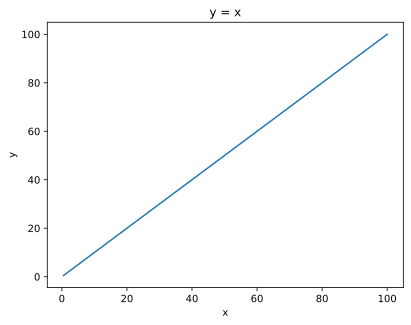

In [5]:
y = x
plt.figure()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = x")

9.2. $y=x^2$

Text(0.5, 1.0, 'y=x^2')

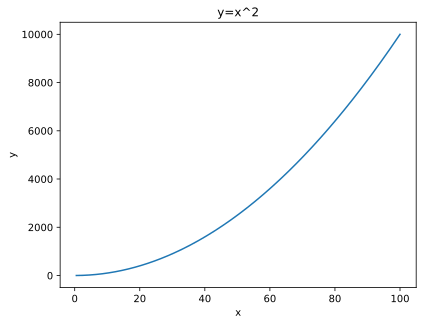

In [6]:
y = x**2
plt.figure()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y=x^2")

9.3. $y=\frac{x^3}{100}$

Text(0.5, 1.0, 'y = (x^3)/100')

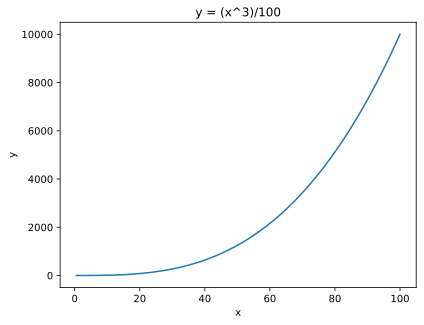

In [7]:
y = x**3/100.0
plt.figure()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = (x^3)/100")

9.4. $y=\sin{(x)}$

Text(0.5, 1.0, 'y = sin(x)')

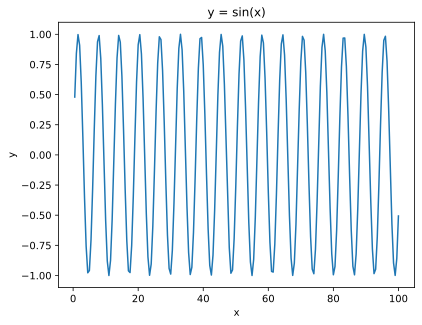

In [8]:
y = np.sin(x)
plt.figure()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = sin(x)")

9.5. $y=\frac{\sin{(x)}}{x}$

Text(0.5, 1.0, 'y = sin(x)/x')

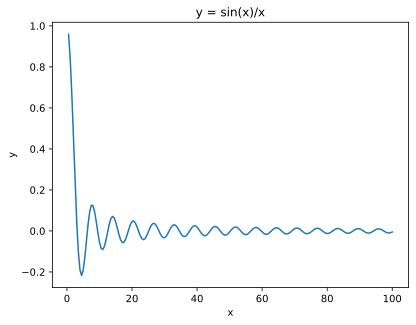

In [9]:
y = np.sin(x)/x
plt.figure()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = sin(x)/x")

9.6. $y=\log{(x)}$

Text(0.5, 1.0, 'y=log(x)')

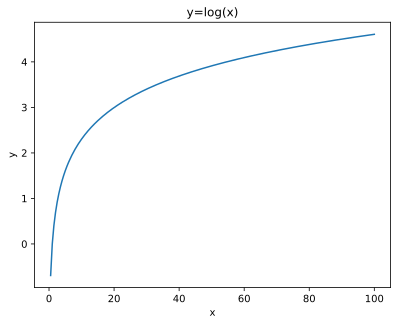

In [10]:
y = np.log(x)
plt.figure()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y=log(x)")

9.7. $y=e^x$

Text(0.5, 1.0, 'y = e^x')

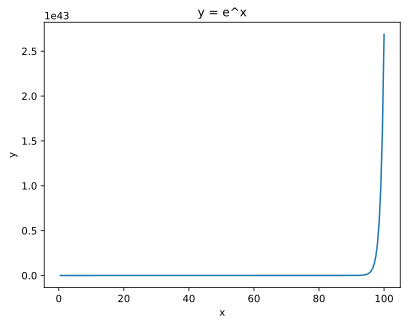

In [11]:
y = np.e**x
plt.figure()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = e^x")

# 10
Using numpy generate a matrix of size `20X5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [155]:
import pandas as pd

In [156]:
random_matrix = np.random.uniform(1,2,size = (20,5))
print(random_matrix)

[[1.94467516 1.98521015 1.05595381 1.64979157 1.54857002]
 [1.89506328 1.59394592 1.91700026 1.06766471 1.49733788]
 [1.47670814 1.44762771 1.15255327 1.22408825 1.24107928]
 [1.80901994 1.85346251 1.00416836 1.87401691 1.55400926]
 [1.82724326 1.21322739 1.89728479 1.52756946 1.5176157 ]
 [1.89009427 1.93852804 1.73728259 1.22737712 1.91612764]
 [1.15266235 1.06866603 1.20076242 1.08551878 1.38828821]
 [1.76490707 1.9910056  1.59377212 1.84849172 1.84884199]
 [1.5231739  1.71575685 1.36501586 1.49647481 1.64837697]
 [1.93156929 1.47471363 1.75356258 1.68095195 1.66658027]
 [1.81673955 1.23446316 1.4770769  1.36389561 1.75826496]
 [1.63546347 1.42746027 1.31334221 1.40537866 1.10491501]
 [1.44890259 1.3317072  1.81634747 1.22015446 1.81136191]
 [1.97320265 1.4018128  1.66805361 1.72642049 1.68620177]
 [1.22644778 1.41838333 1.81230204 1.99351045 1.03336268]
 [1.10452316 1.49264963 1.87387975 1.4743813  1.26644997]
 [1.59185506 1.1380427  1.3406828  1.41583702 1.0272607 ]
 [1.29354834 1

In [157]:
random_dataframe = pd.DataFrame(random_matrix, columns = ['a','b','c','d','e'])
print(random_dataframe)

           a         b         c         d         e
0   1.944675  1.985210  1.055954  1.649792  1.548570
1   1.895063  1.593946  1.917000  1.067665  1.497338
2   1.476708  1.447628  1.152553  1.224088  1.241079
3   1.809020  1.853463  1.004168  1.874017  1.554009
4   1.827243  1.213227  1.897285  1.527569  1.517616
5   1.890094  1.938528  1.737283  1.227377  1.916128
6   1.152662  1.068666  1.200762  1.085519  1.388288
7   1.764907  1.991006  1.593772  1.848492  1.848842
8   1.523174  1.715757  1.365016  1.496475  1.648377
9   1.931569  1.474714  1.753563  1.680952  1.666580
10  1.816740  1.234463  1.477077  1.363896  1.758265
11  1.635463  1.427460  1.313342  1.405379  1.104915
12  1.448903  1.331707  1.816347  1.220154  1.811362
13  1.973203  1.401813  1.668054  1.726420  1.686202
14  1.226448  1.418383  1.812302  1.993510  1.033363
15  1.104523  1.492650  1.873880  1.474381  1.266450
16  1.591855  1.138043  1.340683  1.415837  1.027261
17  1.293548  1.917119  1.165666  1.310899  1.

In [158]:
stdev = random_dataframe.std()
print(stdev)

mean = random_dataframe.mean(axis=1)
print(mean)

print("The column with highest standard deviation is '{}' with value {}.".format(stdev.idxmax(),stdev.max()))
print("The row with the lowest mean is {} with value {}.".format(mean.idxmin(),mean.min()))

a    0.310302
b    0.287849
c    0.305691
d    0.291665
e    0.311721
dtype: float64
0     1.636840
1     1.594202
2     1.308411
3     1.618935
4     1.596588
5     1.741882
6     1.179180
7     1.809404
8     1.549760
9     1.701476
10    1.530088
11    1.377312
12    1.525695
13    1.691138
14    1.496801
15    1.442377
16    1.302736
17    1.346222
18    1.652091
19    1.846336
dtype: float64
The column with highest standard deviation is 'e' with value 0.31172145316394956.
The row with the lowest mean is 6 with value 1.1791795566994583.


# 11
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [163]:
random_dataframe['f'] = random_dataframe[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
random_dataframe['g'] = np.where(random_dataframe['f'] < 8, 'LT8', 'GT8')

num_lt8 = len(random_dataframe[random_dataframe['g']=='LT8'])

stdlt8 = random_dataframe.loc[random_dataframe['g'] == 'LT8', 'f'].std()
stdgt8 = random_dataframe.loc[random_dataframe['g'] == 'GT8', 'f'].std()

print("Dataframe: ")
print(random_dataframe)

print("Number of rows where 'g' is 'LT8':", num_lt8)
print("Standard deviation for 'LT8':", stdlt8)
print("Standard deviation for 'GT8':", stdgt8)

Dataframe: 
           a         b         c         d         e         f    g
0   1.944675  1.985210  1.055954  1.649792  1.548570  8.184201  GT8
1   1.895063  1.593946  1.917000  1.067665  1.497338  7.971012  LT8
2   1.476708  1.447628  1.152553  1.224088  1.241079  6.542057  LT8
3   1.809020  1.853463  1.004168  1.874017  1.554009  8.094677  GT8
4   1.827243  1.213227  1.897285  1.527569  1.517616  7.982941  LT8
5   1.890094  1.938528  1.737283  1.227377  1.916128  8.709410  GT8
6   1.152662  1.068666  1.200762  1.085519  1.388288  5.895898  LT8
7   1.764907  1.991006  1.593772  1.848492  1.848842  9.047018  GT8
8   1.523174  1.715757  1.365016  1.496475  1.648377  7.748798  LT8
9   1.931569  1.474714  1.753563  1.680952  1.666580  8.507378  GT8
10  1.816740  1.234463  1.477077  1.363896  1.758265  7.650440  LT8
11  1.635463  1.427460  1.313342  1.405379  1.104915  6.886560  LT8
12  1.448903  1.331707  1.816347  1.220154  1.811362  7.628474  LT8
13  1.973203  1.401813  1.668054  1.

# 12
Write a small piece of code to explain broadcasting in numpy.

In [202]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

add = matrix + 10

multiply = matrix * np.array([1, 10, 100])

print("Original Matrix:")
print(matrix)

print("Addition by broadcasting:")
print(add)

print("Multiply by broadcasting:")
print(multiply)

print("We didn't need to iterate through the matrix to add or multiply, this is broadcasting.")


Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Addition by broadcasting:
[[11 12 13]
 [14 15 16]
 [17 18 19]]
Multiply by broadcasting:
[[  1  20 300]
 [  4  50 600]
 [  7  80 900]]
We didn't need to iterate through the matrix to add or multiply, this is broadcasting.


# 13
Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.

In [204]:
def custom_argmin(arr):
    min_index = 0

    for i in range(1, len(arr)):
        if arr[i] < arr[min_index]:
            min_index = i

    return min_index

numpy_array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])

result_custom = custom_argmin(numpy_array)

result_np = np.argmin(numpy_array)

print("Custom argmin result:", result_custom)
print("NumPy argmin result:", result_np)

if (result_custom != result_np):
    print("Results do not match.")
else:
    print("Results match.")


Custom argmin result: 1
NumPy argmin result: 1
Results match.
